In [1]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#matplotlib notebook

what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = othera
base directory is C:\Users\BMH_work\github\expression_broad_data
Added C:\Users\BMH_work\github\expression_broad_data to path: 
['', 'C:\\Users\\BMH_work\\github\\expression_broad_data\\scripts', 'C:\\Users\\BMH_work\\Anaconda3\\python37.zip', 'C:\\Users\\BMH_work\\Anaconda3\\DLLs', 'C:\\Users\\BMH_work\\Anaconda3\\lib', 'C:\\Users\\BMH_work\\Anaconda3', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\BMH_work\\Anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\BMH_work\\.ipython', 'C:\\Users\\BMH_work\\github\\expression_broad_data']
Importing expression plots and io_library and setting base_dir and data_processing_dir
Importing io_library.  If autoreload, may need to reset ba

## Compare LFC Between Last year and this year for AS +/- NMPP1

In [2]:
#Load DEseq data for AS +/- drug

pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
#pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_nmpp1.csv'), index_col=0)

#Load DEseq data from 2017 for AS +/-drug

pkainh_deseq_2017 = pd.read_csv(os.path.normpath(data_processing_dir + '\\20170817_klscpka\\20170817_klscpka_DESEQ_YPD_t40_ASMinvASPlus_SC.csv'), index_col=0)

pkainh_deseq_merged = pkainh_deseq.merge(pkainh_deseq_2017, left_index=True, right_index=True, how = 'outer', suffixes = ('','_2017')) 


#Add column for common names
pkainh_deseq_merged['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_deseq_merged.index)

for column in ['log2FoldChange', 'log2FoldChange_2017']: 
    pkainh_deseq_merged[column] = pkainh_deseq_merged[column].fillna(0.0)

In [20]:
spec = 'SC'

data = []

xlabel = 'LFC AS -/+ Nmpp1 2017'
ylabel = 'LFC AS -/+ Nmpp1'

trace = pygo.Scatter(
            x = pkainh_deseq_merged['log2FoldChange_2017'], 
            y =  pkainh_deseq_merged['log2FoldChange'],
            text = pkainh_deseq_merged['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= 'SC_AS_pmNMPP1_2017LFC_V2018')

## Load DEseq data for SCer Rph1/Gis1 delete experiment

In [3]:
#Load DEseq data for SCer Rph1/Gis1 delete experiment

r1g1_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_wtVr1g1.csv'), index_col=0)

#Add column for common names
r1g1_deseq['SC_common_name'] = io_library.SC_common_name_lookup(r1g1_deseq.index)


#Load DEseq data for SCer Msn24/drug interaction contrast
m24_nmpp1_int_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_m24del_nmpp1_interaction.csv'), index_col=0)

#Add column for common names
m24_nmpp1_int_deseq['SC_common_name'] = io_library.SC_common_name_lookup(m24_nmpp1_int_deseq.index)


#Load DEseq data for SCer Msn2/4 delete in WT experiment
m24_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_WT_wtVm24.csv'), index_col=0)

#Add column for common names
m24_deseq['SC_common_name'] = io_library.SC_common_name_lookup(m24_deseq.index)


#Load DEseq data for SCer PKA AS -/+ NMPP1 
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
pkainh_deseq['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_deseq.index)


#Load DEseq data for SCer PKA AS Msn2/4 delete -/+ NMPP1 
pkainh_m24del_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_M24_nmpp1.csv'), index_col=0)
pkainh_m24del_deseq['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_m24del_deseq.index)


coords = {}

In [7]:
#Load Msn2/4 deletion / PKA inhibition groups
spec = 'SC'
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181203_r1g1_m24_pka_targets_' + spec + '.pkl'
with open(fname, 'rb') as file:
    [target_sets, coords] = pickle.load(file)
    
#Load GOI ohnolog data (this is defined later in this script)

fname = data_processing_dir + os.sep + os.path.normpath('kl_sc_PKA_as_m24_r1g1_20181017/gois_20181205.pkl')

with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)


In [3]:
#Make Average rlog data Only need to do once

# #Load Rlog data and metadata
# rlog_all = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_all_SC.csv'), index_col=0)
# metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC.csv'), index_col=0)
# #metadata_SC_orig = metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC_orig.csv'), index_col=0)

# #remove biological replicates
# metadata_SC_noBR = metadata_SC[metadata_SC['replicate']!='BR'].copy()

# #make a label that represents background mutation, deletion, and presence of drug
# metadata_SC_noBR['pka_AS_mut__tf_del__NMPP1'] = metadata_SC['pka_AS_mut'] + '_' + metadata_SC['tf_del'] + '_' + metadata_SC['NMPP1'] 

# metadata_SC_noBR['I7 index str'] = [str(ind) for ind in metadata_SC_noBR.index]
# metadata_SC_noBR.set_index('I7 index str', inplace=True)

# #group samples by mutation, deletion and presence of drug and take mean and variance.  Save as a .csv
# rlog_data_metadata = metadata_SC_noBR.loc[:,['pka_AS_mut__tf_del__NMPP1']].merge(rlog_all.T,how = 'left', left_index = True, right_index = True)
# rlog_data_grouped = rlog_data_metadata.groupby(by=['pka_AS_mut__tf_del__NMPP1'])
# rlog_data_grouped_mean = rlog_data_grouped.agg('mean').T
# rlog_data_grouped_var = rlog_data_grouped.agg('var').T
# rlog_data_mean_var = rlog_data_grouped_mean.merge(rlog_data_grouped_var, how = 'inner', left_index = True, right_index = True, suffixes=['_mean', '_var'])

# rlog_data_mean_var['SC_common_name'] = io_library.SC_common_name_lookup(rlog_data_mean_var.index)
# rlog_data_mean_var.to_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_mean_SC.csv' ))


In [14]:
#load average rlog data
rlog_data_mean_var = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_mean_SC.csv' ),index_col=0)


## Get set of genes effected by PKA

In [4]:
x_data = pkainh_deseq['log2FoldChange']
y_data =  -np.log10(pkainh_deseq['pvalue'])

#To Call PKA AS -/+ activated genes make a line and a low pValue cutoff

x1,y1 = (2.0,15)
x2,y2 = (2.5,0.0)
ymin = 1.5

#save the coordinates in a dictionary
coords['pkainh_act'] = [(x1,y1),(x2,y2),ymin]

pkainh_act_genes = pkainh_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]

print('pkainh_act genes: ' + str(len(pkainh_act_genes)))

#To Call PKA AS -/+ repressed genes make a line and a low pValue cutoff

x1,y1 = (-2.5,0.0)
x2,y2 = (-2.0,15)
ymin = 1.5

#save the coordinates in a dictionary
coords['pkainh_rep'] = [(x1,y1),(x2,y2),ymin]

pkainh_rep_genes = pkainh_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]

print('pkainh_rep genes: ' + str(len(pkainh_rep_genes)))


pkainh_act genes: 509
pkainh_rep genes: 697


In [29]:
#Plot Deseq LFC v.s. pValue for AS -/+ drug
hover_text = pkainh_deseq['SC_common_name']

lines = {}
for geneset in ['act', 'rep']: 
    
    lines[geneset + ' threshold'] = coords['pkainh_' + geneset][0:2]
    
    yminline_p1, yminline_p2 = expression_plots.pval_min_line(coords['pkainh_' + geneset][0:2], coords['pkainh_' + geneset][2], x_data)

    lines[geneset + ' pval min'] = [yminline_p1, yminline_p2] 



fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,lines)

py.iplot(fig, filename='RNAseq2018_SC_PKA_AS_pmNMPP1')

Figure [supp S1]: LFC v.s. -log10(p_value) for Targets of activation and repression in {{spec}} were defined as all genes that fell above the line defined by the points {{x1,y1}} and {{x1,y2}}, and for which -log10(pvalue)>{{ymin}}. 

## Define Differentially expressed paralogs


In [3]:
#Load Ortholog data
ohnologs = pd.read_csv(data_processing_dir + os.path.normpath("ortholog_files_YGOB/ohnologs.csv"), index_col=0)
print('Total number of Ohnologs: ' + str(len(ohnologs)))

#build a dataframe that has all SC paralogs paired up and sorted by log2FoldChange

#merge average rlog data with pkainh_deseq
rlog_cols = ['AS_WT_drug_mean','AS_WT_drug_var','AS_WT_cont_mean','AS_WT_cont_var']
pkainh_deseq_rlog = pkainh_deseq.merge(rlog_data_mean_var.loc[:,rlog_cols],how = 'inner', left_index=True, right_index=True)

data_to_add = pkainh_deseq_rlog.loc[:,['log2FoldChange','pvalue']+rlog_cols]
sort_column = 'log2FoldChange'

ohnologs_expression_sorted = io_library.join_ohnologs_and_sort(data_to_add, ohnologs, sort_column)

Total number of Ohnologs: 547


NameError: name 'rlog_data_mean_var' is not defined

In [6]:
# Identify GOI based on LFC / pval thresholds

min_lfc = 2.0  # Minimum LFC for the high activation paralog
lfc_diff = 2.0 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.0 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff
log10_pval_min = 1.5 

goi_criteria = {'min_lfc': min_lfc, 'lfc_diff': lfc_diff, 'max_low_lfc' : max_low_lfc, 'log10_pval_min': log10_pval_min}

ohnologs_goi = ohnologs_expression_sorted[(ohnologs_expression_sorted['log2FoldChange_high']>min_lfc) &
                                          ((ohnologs_expression_sorted['log2FoldChange_high']-ohnologs_expression_sorted['log2FoldChange_low'])>lfc_diff) &
                                          (ohnologs_expression_sorted['log2FoldChange_low'] < max_low_lfc) & 
                                          ((-np.log10(ohnologs_expression_sorted['pvalue_high']))>1.5) ]

print(len(ohnologs_goi))

#Save list and all sorted ohnolog dataframe as well
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\gois_20181205.pkl'

with open(fname, 'wb') as file:
    pickle.dump([ohnologs_goi,ohnologs_expression_sorted,goi_criteria], file)
                                          

In [47]:
ohnologs_goi[ohnologs_goi['SC_common_name_high']=='PYK2']

,Ancestor,AA %id,Length Ratio,sc_genename_low,SC_common_name_low,log2FoldChange_low,pvalue_low,sc_genename_high,SC_common_name_high,log2FoldChange_high,pvalue_high
Number,,,,,,,,,,,
405,Anc_7.45,70%,0.99,YAL038W,CDC19,-1.013321,0.027852,YOR347C,PYK2,2.432765,0.000018


In [6]:
#Load ohnologs: 
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\gois_20181205.pkl'
with open(fname, 'rb') as file:
    [ohnologs_goi,ohnologs_expression_sorted,goi_criteria] = pickle.load(file)


In [7]:
#Plot LFC under PKA inhibition for low v.s. high fold change

min_lfc = 2.0  # Minimum LFC for the high activation paralog
lfc_diff = 2.0 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.0 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff
log10_pval_min = 1.5 


x_data = ohnologs_expression_sorted['log2FoldChange_low']
y_data = ohnologs_expression_sorted['log2FoldChange_high']

hover_text = []
for ind, row in ohnologs_expression_sorted.iterrows():
    hover_text.append(('Low Paralog: {SC_common_name_low}<br>  LFC: {LFC_low:.2f}<br>  -log10(pval): {pval_low:.2f}<br>' +
                       'High Paralog: {SC_common_name_high}<br>  LFC: {LFC_high:.2f}<br>  -log10(pval): {pval_high:.2f}').format(
                        SC_common_name_low = row['SC_common_name_low'],
                        LFC_low = row['log2FoldChange_low'],
                        pval_low = -np.log10(row['pvalue_low']),
                        SC_common_name_high = row['SC_common_name_high'],
                        LFC_high = row['log2FoldChange_high'],
                        pval_high = -np.log10(row['pvalue_high']))
                      )

#Lines that define my genes of interest

lines = {'Min LFC' : [(min(x_data), min_lfc), (0,min_lfc)], 
         'LFC difference thresh' : [(0,lfc_diff),(max(y_data)-lfc_diff, max(y_data))], 
         'Max Low LFC' : [(max_low_lfc, min_lfc),(max_low_lfc,max(y_data))]
        }




data = []

trace = pygo.Scatter(
            x = x_data, 
            y =  y_data,
            text = hover_text,
            mode = 'markers',
            marker = {'opacity': 0.5}, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'genes'
        )

data.append(trace)

for line_name, line in lines.items():

    x1,y1 = line[0]
    x2,y2 = line[1]

    x = np.array([x1,x2])
    y = np.array([y1,y2])

    trace2 = pygo.Scatter(
        x = x,
        y = y,
        mode = 'lines',
        marker = {'color': 'black',
                  'size': 5},
        name = line_name
    )

    data.append(trace2)

    
# Make shaded area to show my differentiall expressed genes of interest. 
trace3 = pygo.Scatter(
    x=[min(x_data),min(x_data), 0, max_low_lfc, max_low_lfc],
    y=[max(y_data),min_lfc, min_lfc, max_low_lfc+min_lfc, max(y_data)],
    mode='none',
    fill='toself',
    fillcolor = 'rgba(26,150,65,0.5)'
)

data.append(trace3)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC low induction paralog'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC high induciton paralog'
    },
    showlegend=False, 
    height = 600,
    width = 600
)


fig = pygo.Figure(data=data, layout = layout) 
py.iplot(fig, filename='LFC_low_v_high_paralog')  
pio.write_image(fig, os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/LFC_low_v_high_paralog.svg'))


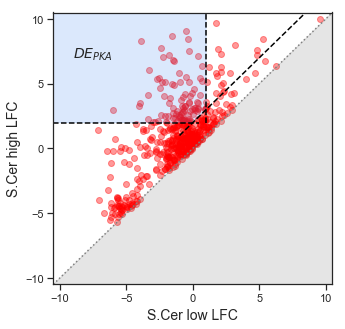

In [41]:
##Goi figure using matplotlib instead of plot.ly and highlighting various go terms

# #Load Go term data
# GO_aspect = 'P'
# go_slims_aspect, go_term_list = io_library.load_goslim_data(GO_aspect, go_slim_fname = 'go_slim_mapping_20181204.tab')


fig, ax = plt.subplots(figsize=(5,5))

min_lfc = 2.0  # Minimum LFC for the high activation paralog
lfc_diff = 2.0 # Difference in LFC to call a differentially expressed paralog
max_low_lfc = 1.0 # Maximum LFC that low activation paralog can have.  I get a ~20 more if I use 2.5 as the cutoff
log10_pval_min = 1.5 


# x_data = ohnologs_expression_sorted['log2FoldChange_low']
# y_data = ohnologs_expression_sorted['log2FoldChange_high']

alpha = 0.4
xmax = 10.5
xmin = -xmax
ymax = xmax
ymin = xmin

color = 'red'

x_data = ohnologs_expression_sorted['log2FoldChange_low']
y_data = ohnologs_expression_sorted['log2FoldChange_high'] 

ax.scatter(x_data, y_data, color=color, alpha=alpha)


#Lines that define my genes of interest

lines = {'Min LFC' : [(xmin, min_lfc), (0.5,min_lfc)], 
         'LFC difference thresh' : [(-1,lfc_diff-1),(ymax-lfc_diff, ymax)], 
         'Max Low LFC' : [(max_low_lfc, min_lfc),(max_low_lfc,ymax)]
        }


for line_name, ((x1,y1),(x2,y2)) in lines.items():
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    ax.plot(x,y,'--', color='black')

#plot y=x
ax.plot([xmin,xmax],[ymin,ymax], ':' , color='gray')

patches = []
x=[xmin, xmin, 0, max_low_lfc, max_low_lfc]
y=[ymax, min_lfc, min_lfc, max_low_lfc+min_lfc, ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "#4d8cf2", alpha=0.2)
patches.append(polygon)

x=[xmin,xmax,xmax]
y=[ymin,ymin,ymax]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, color = "gray", alpha =0.2)
patches.append(polygon)

p = PatchCollection(patches,match_original=True)
#p.set_array(np.array(colors))
ax.add_collection(p)
    
ax.text(-9,7,'$DE_{PKA}$',fontdict={'size':14})
ax.set_xlim([-10.5,10.5])
ax.set_xticks([-10,-5,0,5,10])
ax.set_ylim([-10.5,10.5])
ax.set_yticks([-10,-5,0,5,10])
ax.set_xlabel('S.Cer low LFC',fontdict={'size':14})
ax.set_ylabel('S.Cer high LFC',fontdict={'size':14})

fig.savefig(os.path.normpath("C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/LFC_low_v_high_paralog_mpl.svg"))  





In [39]:
p.set_array?

Figure [gois]: Differentially expressed ohnologs were chosen according to four criteria:  1) The minimum fold change for the activated paralog was 2.0.  2) The maximum fold change of the constitutive/repressed paralog was less than 1.0. 3) There was a difference of at least 2.0 in LFC between the activated and constitutive/repressed fold change paralog and 4) the -log10(pvalue) of the activated paralog was above 1.5. 91/511 paralog pairs met this criteria.  

In [ ]:
##Haven't run this with the SC name yet

#Plot Deseq LFC v.s. pValue for AS -/+ drug
hover_text = pkainh_deseq['SC_common_name']

lines = {}
for geneset in ['act', 'rep']: 
    
    lines[geneset + ' threshold'] = coords['pkainh_' + geneset][0:2]
    
    yminline_p1, yminline_p2 = expression_plots.pval_min_line(coords['pkainh_' + geneset][0:2], coords['pkainh_' + geneset][2], x_data)

    lines[geneset + ' pval min'] = [yminline_p1, yminline_p2] 



fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,lines)

py.iplot(fig, filename='RNAseq2018_SC_PKA_AS_pmNMPP1')

## Msn2/4 Deletion analysis

In [4]:
#Merge PKA inh and PKA inh m24del deseq data
pkainh_deseq_merged = pkainh_deseq.merge(pkainh_m24del_deseq, how = 'inner', left_index = True, right_index = True, suffixes=('_WT','_M24'))


In [5]:
##Plot effect of drug on WT v.s. Msn2/4 delete background

AS_lfc_thresh = 2.0

pkainh_deseq_merged_rep = pkainh_deseq_merged[pkainh_deseq_merged['log2FoldChange_WT']<0]
slope, intercept, r_value, p_value, std_err = stats.linregress(pkainh_deseq_merged_rep['log2FoldChange_WT'], pkainh_deseq_merged_rep['log2FoldChange_M24'])
print('slope : {0:.2f}, intercept: {1:.2f}, R: {2:.2f}'.format(slope,intercept,r_value))

#Separate into different groups: 

#Intersect with pkainh_deseq_merged index to make sure all are contained.  
#I wonder why I have extra in my target sets v.s. the pkainh database:  {'YBR117C', 'YCL048W-A'}
#Others missing from pkainh_act set: 
#{'YBR117C', 'YCL048W-A', 'YDR048C', 'YGL014C-A', 'YLR331C'}

plot_subsets = {'pkainh_act': (target_sets['pkainh_act'] & set(pkainh_deseq_merged.index)), 
                'not pkainh_act': set(pkainh_deseq_merged.index)-target_sets['pkainh_act'],
                'DEpka_low': (set(ohnologs_goi['sc_genename_low']) & set(pkainh_deseq_merged.index)),
                'DEpka_high': (set(ohnologs_goi['sc_genename_high']) & set(pkainh_deseq_merged.index))}

subset_labels = {'pkainh_act': '$ \\text{Induced by PKA inhibition}$', 
                 'not pkainh_act': '$ \\text{Not Induced by PKA inhibition}$', 
                 'DEpka_high': '$DE_{PKA} \\text{ high-induction}$', 
                 'DEpka_low': '$DE_{PKA} \\text{ low-induction}$'}

params =  {'pkainh_act': {'color': 'cyan', 'alpha': 0.5},
           'not pkainh_act': {'color':'grey', 'alpha': 0.3},
           'DEpka_low': {'color':'blue', 'alpha':0.8},
           'DEpka_high': {'color':'red', 'alpha':0.8}
          }
            


data = []


                                 
for subset_name in ['not pkainh_act','pkainh_act','DEpka_high','DEpka_low']:
    subset = plot_subsets[subset_name]
    data_subset = pkainh_deseq_merged.loc[subset,:]
                                 
    trace = pygo.Scatter(
                x = data_subset['log2FoldChange_WT'], #-np.log10(deseq_data['padj_pkainh']), #
                y = data_subset['log2FoldChange_M24'] ,
                text = data_subset['SC_common_name_WT'],
                mode = 'markers',
                marker = {'opacity': params[subset_name]['alpha'],
                          'color' : params[subset_name]['color'],
                          #'colorscale' : 'Jet',
                          #'showscale' : False}  #
                         },
                name = subset_labels[subset_name]
                
                )
        
    data.append(trace)

line_coords_dict = {'LFC threshold': [(AS_lfc_thresh,AS_lfc_thresh),(-1,max(pkainh_deseq_merged['log2FoldChange_M24']))], 
                    '1:1': [(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT'])),(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT']))]
                   }

line_props = {'LFC threshold':('blue','dash'),  #color, dash
              '1:1': ('black',None),
              'lin_reg': ('black','dash')
             }

# m24_threshs = {'M25':0.25, 'M50': 0.5, 'M75': 0.75}

x2 = max(pkainh_deseq_merged['log2FoldChange_WT'])
x1 = min(pkainh_deseq_merged['log2FoldChange_WT'])
# for m24_thresh_name, m24_thresh in m24_threshs.items():
#     #line_coords_dict[m24_thresh_name] = [(0,x2),(0,m24_thresh*x2)]
#     line_coords_dict[m24_thresh_name] = [(x1,x2),(m24_thresh*x1,m24_thresh*x2)]

line_coords_dict['lin_reg']=[(x1,x2), (slope*x1 + intercept, slope*x2 + intercept)]
    
for line_name, line_coords in line_coords_dict.items():

    trace = pygo.Scatter(
        x = np.array(line_coords[0]),
        y = np.array(line_coords[1]),
        mode = 'lines',
        marker = {'color': line_props[line_name][0],
                  'size': 5
                 },
        line = {'dash':line_props[line_name][1]}, 
        showlegend = False
    )
    
    data.append(trace)


thresh_slope = 0.5
M24_min = min(pkainh_deseq_merged[pkainh_deseq_merged['log2FoldChange_WT']>AS_lfc_thresh]['log2FoldChange_M24'])
M24_shape_path = ' M {:0.2f} {:0.2f} L {:0.2f} {:0.2f} L {:0.2f} {:0.2f} L {:0.2f} {:0.2f} Z'.format(AS_lfc_thresh, M24_min, x2, M24_min, x2, thresh_slope*x2, AS_lfc_thresh, thresh_slope*AS_lfc_thresh) 
    
layout = pygo.Layout(
    title= '$\\text{S.Cer}$',
    xaxis= {
        "range":[-11, 11],
        "title":'$\\text{AS LFC}$'
    },
    yaxis= {
        "range":[-11, 11],
        "title":'$\\text{AS-} \Delta \\text{Msn2/4  LFC}$'
    },
    shapes= [{
            'type': 'path',
            'path': M24_shape_path,
            'fillcolor': 'rgba(202, 205, 209,0.6)',
            'line': {
                'color': 'rgb(0,0,0)'
            },
    }],
    width=600,
    height=500
)


fig = pygo.Figure(data=data, layout = layout)
#py.iplot(fig, filename='RNAseq2018_SC_AS_nmpp1_WT_v_M24')

pio.write_image(fig, os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/Msn24_SC.svg'))


slope : 0.57, intercept: 0.16, $R^2$: 0.82


In [ ]:
#Strange that 1:1 line doesn't go through the cloud at the bottom - as though PKA repression
#is also very effected by PKA inhibition.  Or else my measurements were systematically less sensitive
#for WT than they were for Msn2/4 cells. 


In [20]:
Polygon?

In [ ]:
scatter.

regression for slope : 0.57, intercept: 0.16, R: 0.82


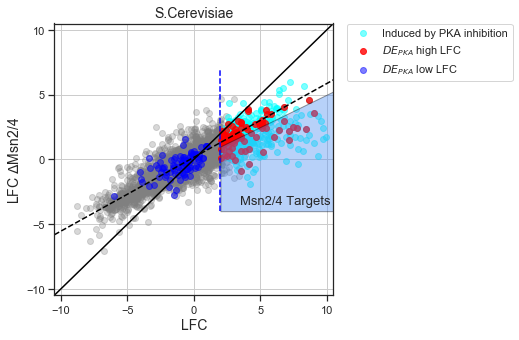

In [33]:
#Same as above but in matplotlib instead of plot.ly for manuscript consistancy: 


fig, ax = plt.subplots(figsize=(5,5))

xmax = 10.5
xmin = -xmax
ymax = xmax
ymin = xmin

#Scatter Plots
# (subset_gene_list, show_label, color, alpha)
subsets = OrderedDict({'Other': (set(pkainh_deseq_merged.index)-target_sets['pkainh_act'], 
                                    False, 'grey',0.3),
                           'Induced by PKA inhibition': ( (target_sets['pkainh_act'] & set(pkainh_deseq_merged.index)), 
                                                         True,'cyan', 0.5),
                           '$DE_{PKA}$ high LFC':((set(ohnologs_goi['sc_genename_high']) & set(pkainh_deseq_merged.index)),
                                                  True,'red',0.8),
                           '$DE_{PKA}$ low LFC': ( (set(ohnologs_goi['sc_genename_low']) & set(pkainh_deseq_merged.index)),
                                                  True, 'blue', 0.5)
                             })


for subset_name, (subset_gene_list, show_label, color, alpha) in subsets.items():
    subset = pkainh_deseq_merged.loc[subset_gene_list,:]
    
    scatter = ax.scatter(subset['log2FoldChange_WT'], 
                         subset['log2FoldChange_M24'],
                         color = color, alpha = alpha)
    
    if show_label: 
        scatter.set_label(subset_name)
    else: 
        scatter.set_label(None)

    
#lines  

pkainh_deseq_merged_rep = pkainh_deseq_merged[pkainh_deseq_merged['log2FoldChange_WT']<0]
slope, intercept, r_value, p_value, std_err = stats.linregress(pkainh_deseq_merged_rep['log2FoldChange_WT'], pkainh_deseq_merged_rep['log2FoldChange_M24'])
print('regression for slope : {0:.2f}, intercept: {1:.2f}, R: {2:.2f}'.format(slope,intercept,r_value))

x2 = max(pkainh_deseq_merged['log2FoldChange_WT'])
x1 = min(pkainh_deseq_merged['log2FoldChange_WT'])

AS_lfc_thresh = 2.0
low_y = -4

#(((x1,y1),(x2,y2)), color, style)
lines = {'LFC threshold' : (((AS_lfc_thresh, low_y), (AS_lfc_thresh,7)),'blue','--'), 
         '1:1' : (((xmin, xmin),(xmax,xmax)),'black','-'), 
         'lin_reg' : (((xmin, xmin*slope + intercept),(xmax,xmax*slope + intercept)),'black','--')
        }


for line_name, (((x1,y1),(x2,y2)), color, style) in lines.items():
    x = np.array([x1,x2])
    y = np.array([y1,y2])
    ax.plot(x,y,style, color=color)

#Plot Msn2/4 target region

thresh_slope = 0.5
#M24_min = min(pkainh_deseq_merged[pkainh_deseq_merged['log2FoldChange_WT']>AS_lfc_thresh]['log2FoldChange_M24'])

patches = []
x=[AS_lfc_thresh, xmax, xmax, AS_lfc_thresh]
y=[low_y,  low_y, thresh_slope*xmax, thresh_slope*AS_lfc_thresh]
xy = zip(x,y)
polygon = Polygon(list(xy), closed=True, edgecolor= 'black', facecolor = "#4d8cf2", alpha=0.4)
patches.append(polygon)

p = PatchCollection(patches,match_original=True)
#p.set_array(np.array(colors))
ax.add_collection(p)
    
ax.text(3.5, -3.5,'Msn2/4 Targets',fontdict={'size':13})
ax.set_xlim([xmin,xmax])
ax.set_yticks([-10,-5,0,5,10])
ax.set_ylim([ymin, ymax])
ax.set_xlabel('LFC',fontdict={'size':14})
ax.set_ylabel('LFC $\Delta$Msn2/4',fontdict={'size':14})
ax.grid(True)
ax.set_title('S.Cerevisiae', fontdict={'size':14})
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig.savefig(os.path.normpath('C:/Users/BMH_work/Google Drive/UCSF/ElSamad_Lab/PKA/Manuscript/Msn24_SC.svg'))




In [12]:
#Save a subset of 
#A) PKA inhibited genes   and
#B) DEpka genes 
#That is below a given threshold reduction of LFC

m24_thresh = 0.5

pkainh_deseq_merged['LFC_m24/wt'] = pkainh_deseq_merged['log2FoldChange_M24']/pkainh_deseq_merged['log2FoldChange_WT']

m24_targets = {}
for subset_name in ['DEpka_high', 'pkainh_act']: 
    subset = plot_subsets[subset_name]
    data_subset = pkainh_deseq_merged.loc[subset,:]
    data_subset_m24 = data_subset[data_subset['LFC_m24/wt']<m24_thresh]
    print(len(data_subset_m24))
    print(len(data_subset))
    m24_targets[subset_name] = set(data_subset_m24.index)
    
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20190319_m24_depka_targets_Scer.pkl'

with open(fname, 'wb') as file:
    pickle.dump(m24_targets, file)

36
89
245
504


In [9]:
# Makes a number of target M24 deletion sets

#Repression percentage method to get Msn2/4 targets:
#list of thresholds to use for effect of Msn24 deletion on PKA inhibition. 
AS_lfc_thresh = 2.0
msn24_threshs = [0.25,0.5,0.6, 0.75]
AS_pval_thresh = 1.5


#I should filter out genes that have low pvalues
pkainh_deseq_merged_subset = pkainh_deseq_merged.loc[(-np.log10(pkainh_deseq_merged['padj_WT'])>AS_pval_thresh) & (pkainh_deseq_merged['log2FoldChange_WT']>AS_lfc_thresh),:]
pkainh_deseq_merged_subset['M24_induction_fraction'] = pkainh_deseq_merged_subset['log2FoldChange_M24']/pkainh_deseq_merged_subset['log2FoldChange_WT']
#This gives a setting with copy warning, but that's ok - I copied the data into a new dataframe. 

msn24_sets = {}

for msn24_thresh in msn24_threshs:
    msn24_thresh_str = '{:.2f}'.format(msn24_thresh)
    msn24_sets['M_'+msn24_thresh_str.split('.')[1]] = list(pkainh_deseq_merged_subset[pkainh_deseq_merged_subset['M24_induction_fraction']<msn24_thresh].index)
    msn24_sets['NM_'+msn24_thresh_str.split('.')[1]] = list(pkainh_deseq_merged_subset[pkainh_deseq_merged_subset['M24_induction_fraction']>msn24_thresh].index)

    
fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181128_m24_pka_targets_vary_slope_' + spec + '.pkl'

with open(fname, 'wb') as file:
    pickle.dump(msn24_sets, file)


C:\Users\BMH_work\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
set_to_compare = 'M_75'

intersection = set(m24_nmpp1_act_genes.index) & set(msn24_sets[set_to_compare])
interaction_only = set(m24_nmpp1_act_genes.index) - set(msn24_sets[set_to_compare])
slope_only = set(msn24_sets[set_to_compare]) -set(m24_nmpp1_act_genes.index) 

qc_sets = {'intersection':intersection,
           'interaction_only': interaction_only,
           'slope_only': slope_only
          }

for name, qc_set in qc_sets.items():
    print(name)
    print(len(qc_set))
    print(io_library.SC_common_name_lookup(list(qc_set)))

NameError: name 'm24_nmpp1_act_genes' is not defined

In [48]:
#Check number of items below 50 and 25 in each set

#Calculate amount of Msn2/4 reduction
pkainh_deseq_merged['LFC_m24/wt'] = pkainh_deseq_merged['log2FoldChange_M24']/pkainh_deseq_merged['log2FoldChange_WT']

N_tot = {}
N_m24 = {}
for subset_name in ['pkainh_act','DEpka_high']: 
    subset = plot_subsets[subset_name]
    data_subset = pkainh_deseq_merged.loc[subset,:]


    N_tot[subset_name] = len(data_subset)
    N_m24[subset_name] = {}

    for pct_name, pct in {'25':0.25, '50':0.5}.items():
        N_m24[subset_name][pct_name] = len(data_subset[data_subset['LFC_m24/wt']<pct])


pvals = {}
for pct_name in ['25','50']:
    oddsratio, pval = stats.fisher_exact([[N_m24['DEpka_high'][pct_name], N_m24['pkainh_act'][pct_name]],
                        [N_tot['DEpka_high'], N_tot['pkainh_act']]],
                        alternative = 'two-sided')
    pvals[pct_name] = pval
    print(pct_name)
    print('pkainh_act pct : {:.02f}'.format(N_m24['pkainh_act'][pct_name]/N_tot['pkainh_act']))
    print('DEpka_high pct : {:.02f}'.format(N_m24['DEpka_high'][pct_name]/N_tot['DEpka_high']))

pvals

KeyError: 'LFC_m24/wt'

In [86]:
pkainh_deseq_merged[pkainh_deseq_merged['SC_common_name_WT']=='STI1']
#pkainh_m24del_deseq[pkainh_m24del_deseq['SC_common_name']=='TKL2']

,baseMean_WT,log2FoldChange_WT,lfcSE_WT,stat_WT,pvalue_WT,padj_WT,SC_common_name_WT,baseMean_M24,log2FoldChange_M24,lfcSE_M24,stat_M24,pvalue_M24,padj_M24,SC_common_name_M24
YOR027W,1659.941074,1.677797,0.300976,5.574522,2.482109e-08,1.358777e-07,STI1,629.669769,-0.069992,0.285496,-0.245158,0.806334,0.927056,STI1


### Rlog comparison of msn2/4 data

In [18]:
##Plot rlog AS Msn24 v.s. AS WT

#AS_lfc_thresh = 2.0


#Separate into different groups: 

plot_subsets = {'pkainh_act': target_sets['pkainh_act'], 
                'not pkainh_act': set(rlog_data_mean_var.index)-target_sets['pkainh_act'],
                'DEpka_low': set(ohnologs_goi['sc_genename_low']),
                'DEpka_high': set(ohnologs_goi['sc_genename_high'])}


params =  {'pkainh_act': {'color': 'cyan', 'alpha': 0.8},
           'not pkainh_act': {'color':'grey', 'alpha': 0.3},
           'DEpka_low': {'color':'blue', 'alpha':0.8},
           'DEpka_high': {'color':'red', 'alpha':0.8}
          }
            


data = []


                                 
for subset_name, subset in plot_subsets.items():
    data_subset = rlog_data_mean_var.loc[subset,:]
                                 
    trace = pygo.Scatter(
                x = data_subset['AS_WT_cont_mean'], #-np.log10(deseq_data['padj_pkainh']), #
                y = data_subset['AS_M24_cont_mean'] ,
                text = data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': params[subset_name]['alpha'],
                          'color' : params[subset_name]['color'],
                          #'colorscale' : 'Jet',
                          #'showscale' : False}  #
                         },
                name = subset_name
                
                )
        
    data.append(trace)

line_coords_dict = {'1:1': [(min(rlog_data_mean_var['AS_WT_cont_mean']),max(rlog_data_mean_var['AS_WT_cont_mean'])),(min(rlog_data_mean_var['AS_WT_cont_mean']),max(rlog_data_mean_var['AS_WT_cont_mean']))]}

#{'LFC threshold': [(AS_lfc_thresh,AS_lfc_thresh),(-1,max(pkainh_deseq_merged['log2FoldChange_M24']))], 
#                     '1:1': [(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT'])),(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT']))]
#                    }

# m24_threshs = {'M25':0.25, 'M50': 0.5, 'M75': 0.75}

# for m24_thresh_name, m24_thresh in m24_threshs.items():
#     x2 = max(pkainh_deseq_merged['log2FoldChange_WT'])
#     line_coords_dict[m24_thresh_name] = [(0,x2),(0,m24_thresh*x2)]

for line_name, line_coords in line_coords_dict.items():

    trace = pygo.Scatter(
        x = np.array(line_coords[0]),
        y = np.array(line_coords[1]),
        mode = 'lines',
        marker = {'color': 'black',
                  'size': 5},
        name = line_name
    )
    
    data.append(trace)


layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'rlog WT no drug'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'rlog M24 no drug'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='rlog_wt_v_m24_SC_no_drug')

In [19]:
##Plot rlog AS Msn24 v.s. AS WT

#AS_lfc_thresh = 2.0


#Separate into different groups: 

plot_subsets = {'pkainh_act': target_sets['pkainh_act'], 
                'not pkainh_act': set(rlog_data_mean_var.index)-target_sets['pkainh_act'],
                'DEpka_low': set(ohnologs_goi['sc_genename_low']),
                'DEpka_high': set(ohnologs_goi['sc_genename_high'])}


params =  {'pkainh_act': {'color': 'cyan', 'alpha': 0.8},
           'not pkainh_act': {'color':'grey', 'alpha': 0.3},
           'DEpka_low': {'color':'blue', 'alpha':0.8},
           'DEpka_high': {'color':'red', 'alpha':0.8}
          }
            


data = []


                                 
for subset_name, subset in plot_subsets.items():
    data_subset = rlog_data_mean_var.loc[subset,:]
                                 
    trace = pygo.Scatter(
                x = data_subset['AS_WT_drug_mean'], #-np.log10(deseq_data['padj_pkainh']), #
                y = data_subset['AS_M24_drug_mean'] ,
                text = data_subset['SC_common_name'],
                mode = 'markers',
                marker = {'opacity': params[subset_name]['alpha'],
                          'color' : params[subset_name]['color'],
                          #'colorscale' : 'Jet',
                          #'showscale' : False}  #
                         },
                name = subset_name
                
                )
        
    data.append(trace)

line_coords_dict = {'1:1': [(min(rlog_data_mean_var['AS_WT_drug_mean']),max(rlog_data_mean_var['AS_WT_drug_mean'])),(min(rlog_data_mean_var['AS_WT_drug_mean']),max(rlog_data_mean_var['AS_WT_drug_mean']))]}

#{'LFC threshold': [(AS_lfc_thresh,AS_lfc_thresh),(-1,max(pkainh_deseq_merged['log2FoldChange_M24']))], 
#                     '1:1': [(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT'])),(min(pkainh_deseq_merged['log2FoldChange_WT']),max(pkainh_deseq_merged['log2FoldChange_WT']))]
#                    }

# m24_threshs = {'M25':0.25, 'M50': 0.5, 'M75': 0.75}

# for m24_thresh_name, m24_thresh in m24_threshs.items():
#     x2 = max(pkainh_deseq_merged['log2FoldChange_WT'])
#     line_coords_dict[m24_thresh_name] = [(0,x2),(0,m24_thresh*x2)]

for line_name, line_coords in line_coords_dict.items():

    trace = pygo.Scatter(
        x = np.array(line_coords[0]),
        y = np.array(line_coords[1]),
        mode = 'lines',
        marker = {'color': 'black',
                  'size': 5},
        name = line_name
    )
    
    data.append(trace)


layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'rlog WT NMPP1'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'rlog M24 NMPP1'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='rlog_wt_v_m24_SC_NMPP1')

## Venn Diagrams

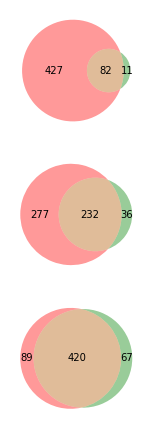

In [115]:
# Venn Diagrams with PKA inhibition

fig, axarr = plt.subplots(3,1, figsize =(20,7.5))

jj = 0

for jj, msn24_set_name in enumerate(['M_25','M_50','M_75']):
    ax = axarr[jj]
    venn2([ set(pkainh_act_genes.index), set(msn24_sets[msn24_set_name])], ax = ax, set_labels = None) # set_labels = [ 'Activated under PKA inhibition', 'Activation requires Msn2/4'])


In [30]:
#To Call Rph1/Gis1 repressed genes make a line from (1.5, 3) to (3.0, 0) and a hard cutoff below of 0.5

x1,y1 = (1.0,7.0)  #(1.0,4.8) #(1.0,4.0)
x2,y2 = (2.5,0.0)  #(1.5, 0.0) #(2.5,0.0)
ymin =  0.4           #0.4

line_coords = [(x1,y1),(x2,y2),ymin]
coords['r1g1_rep'] = line_coords

x = r1g1_deseq['log2FoldChange']
y =  -np.log10(r1g1_deseq['pvalue'])

r1g1_rep_genes = r1g1_deseq[(y > y2- (y2-y1)/(x2-x1)*(x2-x)) & (y>ymin)]

print(len(r1g1_rep_genes))

154


In [118]:
#Plot Deseq LFC v.s. pValue for rph1/gis1 deletion

x_data = r1g1_deseq['log2FoldChange']
y_data = -np.log10(r1g1_deseq['pvalue'])
hover_text = r1g1_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,coords['r1g1_rep'])

py.iplot(fig, filename='RNAseq2018_AS_VS_R1G1')

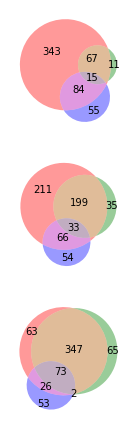

In [119]:
# Venn Diagrams with PKA inhibition

fig, axarr = plt.subplots(3,1, figsize =(20,7.5))

jj = 0

for jj, msn24_set_name in enumerate(['M_25','M_50','M_75']):
    ax = axarr[jj]
    venn3([ set(pkainh_act_genes.index), set(msn24_sets[msn24_set_name]), set(r1g1_rep_genes.index)], ax = ax, set_labels = None) # set_labels = [ 'Activated under PKA inhibition', 'Activation requires Msn2/4'])


In [31]:
#To Call Msn2/4 PKA interaction genes make a line and a hard cutoff for -log10p value 


x1,y1 = (-2.0,0.0) #low thresh (-3.5,0.0) #high thresh    #(-4.0,0.0)
x2,y2 = (-1.5,8.0) #low thresh (-1.8,13.0) #high thresh  #(-2.4,16.5)
ymin = 0.5 #low thresh #1.0 #high thresh #1.0

line_coords = [(x1,y1),(x2,y2),ymin]
coords['m24_nmpp1_int'] = line_coords

x_data = m24_nmpp1_int_deseq['log2FoldChange']
y_data = -np.log10(m24_nmpp1_int_deseq['pvalue'])

m24_nmpp1_act_genes = m24_nmpp1_int_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]

print(len(m24_nmpp1_act_genes))

299


In [78]:
m24_nmpp1_int_deseq[m24_nmpp1_int_deseq['SC_common_name']=='HSP12']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SC_common_name
YFL014W,10792.998045,-2.675336,0.929168,-2.87928,0.003986,0.037592,HSP12


In [59]:
#Plot Msn24/nmpp1 interaction LFC v.s. pValue

line_coords = [(x1,y1),(x2,y2),ymin]

hover_text = m24_nmpp1_int_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,line_coords)

py.iplot(fig, filename='RNAseq2018_Msn24_drug_interaction')


In [32]:
#To Call Msn2/4 deletion genes make a line from and a hard cutoff for -log10p value of above 0.5. 
#This was chosen to include CYC7 and HOR7 but not MPC3. 

x1,y1 = (-1.5,0.0)
x2,y2 = (-1.0,3.0)
ymin = 0.3

line_coords = [(x1,y1),(x2,y2),ymin]
coords['m24_act'] = line_coords

x_data = m24_deseq['log2FoldChange']
y_data =  -np.log10(m24_deseq['pvalue'])

m24_act_genes = m24_deseq[(y_data > y2- (y2-y1)/(x2-x1)*(x2-x_data)) & (y_data>ymin)]

print(len(m24_act_genes))


104


In [61]:
#Plot Deseq LFC v.s. pValue

line_coords = [(x1,y1),(x2,y2),ymin]

hover_text = m24_deseq['SC_common_name']

fig = expression_plots.lfc_padj_plot_with_lines(x_data,y_data,hover_text,line_coords)

py.iplot(fig, filename='RNAseq2018_WT_VS_M24')


In [95]:
r1g1_deseq[r1g1_deseq['SC_common_name']=='CYC7']

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,SC_common_name
YEL039C,17.431676,2.214395,0.645173,3.432249,0.000599,0.025476,CYC7


In [96]:
#Project Msn2/4 dependent genes onto PKA inhibition genes


#Compare PKA inhibition LFC to r1g1 activation

other_deseq= m24_nmpp1_int_deseq
other_name = 'm24_nmpp1'

#deseq_data = pkainh_deseq.merge(m24_nmpp1_int_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_m24_nmpp1'))
deseq_data = pkainh_deseq.merge(other_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_' + other_name))

hover_text = []
for ind, row in deseq_data.iterrows():
    hover_text.append(('{SC_common_name}<br>padj 1NMPP1: {pkainh_padj:.2f}<br>padj ' + other_name +' : {other_padj:.2f}').format(
                              SC_common_name=row['SC_common_name_pkainh'],
                              pkainh_padj = -np.log10(row['padj_pkainh']),
                              other_padj = -np.log10(row['padj_' + other_name])
                              ))


data = []

trace = pygo.Scatter(
            x = deseq_data['log2FoldChange_pkainh'], #-np.log10(deseq_data['padj_pkainh']), #
            y = deseq_data['log2FoldChange_'+other_name], #-np.log10(deseq_data['padj_r1g1']),  #
            text = hover_text,
            mode = 'markers',
            marker = {'opacity': 0.5,
              'color' : np.log10(deseq_data['padj_' + other_name]),
              'colorscale' : 'Jet',
              'showscale' : False}  #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            #name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC AS + 1NMPP1'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC ' + other_name
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_SC_AS_nmpp1_'+other_name)


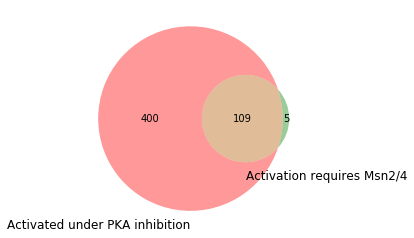

In [62]:
venn2([ set(pkainh_act_genes.index), set(m24_nmpp1_act_genes.index)], set_labels = [ 'Activated under PKA inhibition', 'Activation requires Msn2/4'])

In [100]:
#Compare PKA inhibition LFC to r1g1 activation

other_deseq= r1g1_deseq
other_name = 'r1g1'

#deseq_data = pkainh_deseq.merge(m24_nmpp1_int_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_m24_nmpp1'))
deseq_data = pkainh_deseq.merge(other_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_' + other_name))

hover_text = []
for ind, row in deseq_data.iterrows():
    hover_text.append(('{SC_common_name}<br>padj 1NMPP1: {pkainh_padj:.2f}<br>padj ' + other_name +' : {other_padj:.2f}').format(
                              SC_common_name=row['SC_common_name_pkainh'],
                              pkainh_padj = -np.log10(row['padj_pkainh']),
                              other_padj = -np.log10(row['padj_' + other_name])
                              ))


data = []

trace = pygo.Scatter(
            x = deseq_data['log2FoldChange_pkainh'], #-np.log10(deseq_data['padj_pkainh']), #
            y = deseq_data['log2FoldChange_'+other_name], #-np.log10(deseq_data['padj_r1g1']),  #
            text = hover_text,
            mode = 'markers',
            marker = {'opacity': 0.5,
              'color' : np.log10(deseq_data['padj_' + other_name]),
              'colorscale' : 'Jet',
              'showscale' : False}  #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            #name = 'WT VS Rph1/Gis1 del'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC AS + 1NMPP1'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'LFC ' + other_name
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_SC_AS_nmpp1_'+other_name)


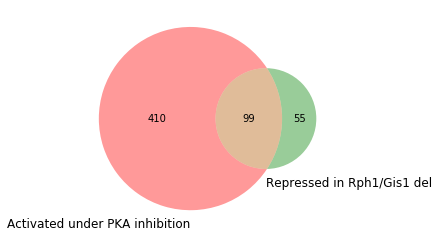

In [63]:
venn2([ set(pkainh_act_genes.index), set(r1g1_rep_genes.index)], set_labels = [ 'Activated under PKA inhibition', 'Repressed in Rph1/Gis1 del'])

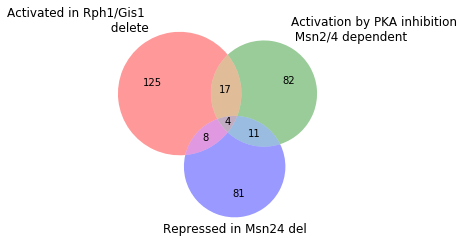

In [64]:
venn3([set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = ['Activated in Rph1/Gis1 \n delete', 'Activation by PKA inhibition \n Msn2/4 dependent', 'Repressed in Msn24 del'])

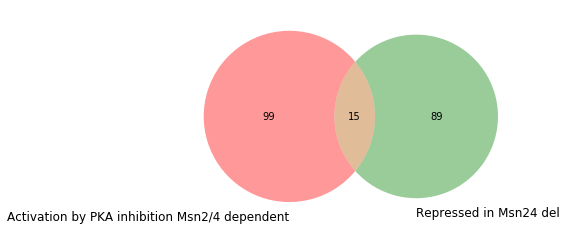

In [65]:
venn2([ set(m24_nmpp1_act_genes.index), set(m24_act_genes.index)], set_labels = [ 'Activation by PKA inhibition Msn2/4 dependent', 'Repressed in Msn24 del'])

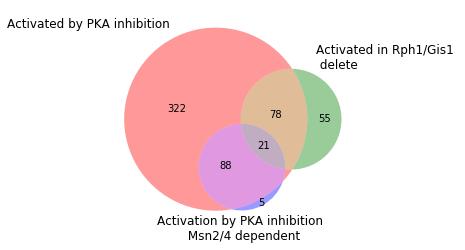

In [66]:
venn3([set(pkainh_act_genes.index),set(r1g1_rep_genes.index), set(m24_nmpp1_act_genes.index)], set_labels = ['Activated by PKA inhibition','Activated in Rph1/Gis1 \n delete', 'Activation by PKA inhibition \n Msn2/4 dependent'])
#venn3([set(m24_act_genes.index), set(m24_nmpp1_act_genes.index), set(pkainh_act_genes.index)], set_labels = ['Activated in Rph1/Gis1 \n delete (exp growth)', 'Activation by PKA inhibition \n Msn2/4 dependent', 'Activated by PKA inhibition'])

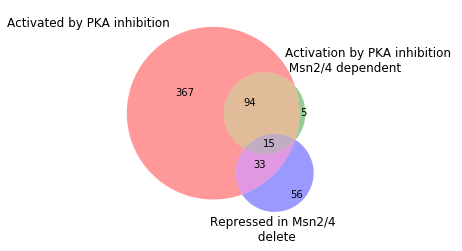

In [67]:
venn3([set(pkainh_act_genes.index), set(m24_nmpp1_act_genes.index),set(m24_act_genes.index) ], set_labels = ['Activated by PKA inhibition', 'Activation by PKA inhibition \n Msn2/4 dependent','Repressed in Msn2/4 \n delete'])

## Saving lists of genes based on experimental cutoffs

In [35]:
#Print out the gene sets and put them into a dictionary - save the dictionary as a .pkl
#Repressed in Msn2/4 Delete basally

spec = 'SC'

msn2_level = 'M_75'

target_sets = {'m24_nmpp1_act': set(msn24_sets[msn2_level]), #set(m24_nmpp1_act_genes.index),
               'r1g1_rep': set(r1g1_rep_genes.index),
               'm24_act': set(m24_act_genes.index), 
               'pkainh_act' : set(pkainh_act_genes.index),
               'pkainh_rep' : set(pkainh_rep_genes.index)}

fname = data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181203_r1g1_m24_pka_targets_' + spec + '.pkl'

with open(fname, 'wb') as file:
    pickle.dump([target_sets, coords], file)


In [69]:
coords

{'pkainh_act': [(2.0, 15), (2.5, 0.0), 1.5],
 'r1g1_rep': [(1.0, 7.0), (2.5, 0.0), 0.4],
 'm24_nmpp1_int': [(-3.5, 0.0), (-1.8, 13.0), 1.0],
 'm24_act': [(-1.5, 0.0), (-1.0, 3.0), 0.3]}

In [133]:
#quickly print out names of target genes

print('Full Sets: \n')
for name, gene_set in target_sets.items():
    print(name + ', N_genes = ' + str(len(gene_set)) + ':')
    print(', '.join(list(io_library.SC_common_name_lookup(gene_set))))
    print('\n')

print('Intersections: \n')

gene_set = target_sets['m24_nmpp1_act']-target_sets['r1g1_rep']
print('m24_nmpp1_only, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(io_library.SC_common_name_lookup(gene_set))) + '\n')


gene_set = target_sets['r1g1_rep']-target_sets['m24_nmpp1_act']
print('r1g1_rep_only, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(io_library.SC_common_name_lookup(gene_set)))+ '\n')


gene_set = target_sets['r1g1_rep'] & target_sets['m24_nmpp1_act']
print('r1g1_rep_and_m24_nmpp1_act, N_genes = ' + str(len(gene_set)) + ':')
print(', '.join(list(io_library.SC_common_name_lookup(gene_set)))+ '\n')




Full Sets: 

m24_nmpp1_act, N_genes = 487:
NDI1, DDP1, YDR018C, YAP6, NTH1, ASG7, YGR018C, YML131W, YMR196W, LSO1, EDS1, RFS1, MCP1, AIM19, CAT2, HSP31, GAC1, DAN4, YBR056W, GRE2, FMP33, STL1, SPS19, YLR345W, MIX14, YHR097C, AIM41, ALD2, MHP1, RGI1, SGA1, DSC3, APE3, SNF3, YFL041W-A, TSL1, GDH3, XKS1, TPS1, COQ6, YDR034W-B, CRG1, YPI1, APC9, HUL4, SIP4, COQ3, YDR381C-A, SDH5, GPM2, YBR284W, NQM1, YJL070C, PEX18, YLR118C, POT1, PPE1, GPH1, EGH1, ATG4, YET2, YOR019W, CMC4, UBC8, ADP1, CUZ1, NGL3, POM33, SCS22, HSP26, FRE2, YDL206W, GIP2, YOR186W, AAC1, MAM3, YER068C-A, PRY1, YHR007C-A, ATG36, CAT8, YPR098C, YPR172W, YER084W-A, ECI1, ADY3, BDH1, COX26, CMG1, PKP2, FRT2, STR3, GTT1, GRX1, YDL057W, YDL062W, COQ11, AVT6, YKL107W, RNR3, VPS65, SPG4, YLR173W, TMC1, CAT5, PIC2, IRC18, UBX3, CMK1, PEP4, YAP1801, SPO1, MPC54, ZWF1, GDB1, GUT2, POR1, NUR1, BOP2, YGR053C, VHS1, SSA4, YDR406W-A, YBL039W-B, SDS24, YJL144W, YCP4, ATG7, TDA10, SIP2, YHR193C-A, TPS2, DIA3, PUT1, URA10, YPR127W, UGA2, AT

YLR030W, UBC8, REC114, ATG33, TSL1, RRT8, GSM1, XBP1, HSP26, TMC1, YNR014W, XKS1, YLR311C, RDL1, NTH1, YHR140W, XYL2, CTT1, YPT53, GAD1, ZWF1, IGD1, YLR031W, IRC24, MAM3, YBR241C, AMS1, PEX30, HYR1, SSE2, SIP4, MAG1, ATG39, SOD2, GLG2, SDP1, HES1, YHL044W, GPM2, YIR014W, YBR284W, FMP48, PHM7, TRX3, CYC7, RNY1, YJL070C, YER084W-A, SHC1, PCH2, YGR053C, GAC1, YBR056W, COX26, RTC3, HEF3, SDS24, YLR345W, LEE1, STR3, GTT1, EGO4, NDE2, ATG7, MXR2, YET2, UGX2, DBP1, YDR491C, GPD1, DCS2, ATG1, DSF1, RGI1, SGA1



In [22]:
#Plot LFC of RG activation v.s. M24 drug interaction

r1g1_m24int_merge = r1g1_deseq.merge(m24_nmpp1_int_deseq, how='inner',suffixes= ('_RGrep','_M24act'),left_index=True, right_index=True)


data = []

trace = pygo.Scatter(
            x = r1g1_m24int_merge['log2FoldChange_RGrep'], 
            y =  r1g1_m24int_merge['log2FoldChange_M24act'],
            text = r1g1_m24int_merge['SC_common_name_RGrep'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = 'Rph1/Gis1 repressed LFC vs Msn24_PKA activation LFC'
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        "range":[-20, 20],
        "title":'Rph1/Gis1 del v.s. WT LFC'
    },
    yaxis= {
        "range":[-10, 10],
        "title":'Msn24 del/PKA inhibition interaction term LFC'
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename='RNAseq2018_R1G1rep_v_M24PKAact')

In [23]:
r1g1_m24int_merge[r1g1_m24int_merge['SC_common_name_M24act']=='HSP12']

,baseMean_RGrep,log2FoldChange_RGrep,lfcSE_RGrep,stat_RGrep,pvalue_RGrep,padj_RGrep,SC_common_name_RGrep,baseMean_M24act,log2FoldChange_M24act,lfcSE_M24act,stat_M24act,pvalue_M24act,padj_M24act,SC_common_name_M24act
YFL014W,48.704855,-0.821724,0.575935,-1.426765,0.153648,0.99735,HSP12,4586.58369,-3.874665,1.27219,-3.045665,0.002322,0.031496,HSP12


## Promoter analysis of various groups

In [7]:
#Read in the SC promoter database.  
sc_promoters = pd.read_pickle(data_processing_dir + os.path.normpath("sc_promoters/sc_promoters.pkl"))

In [15]:
#Make promoter files for different sets

genesets = {'r1g1_rep': r1g1_rep_genes.index, 'm24_act': m24_act_genes.index, 'm24_nmpp1_act': m24_nmpp1_act_genes.index}

for name, geneset in genesets.items(): 
    target_promoter_fname = data_processing_dir + os.path.normpath('sc_promoters/promoter_sets/sc_20181101_' + name + '.fasta')
    io_library.write_promoter_file(sc_promoters, geneset,target_promoter_fname)

tD(GUC)I1 not in promoter data set.
tE(UUC)K not in promoter data set.
tT(AGU)O2 not in promoter data set.
tV(AAC)M3 not in promoter data set.
tS(AGA)D2 not in promoter data set.


## Looking at rLog data


In [2]:
#See what AS+ in RG and no deletion backgrounds looks like
#should also do this with DEseq

#20181017_metadata_V2_postseq
rlog_all = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_all_SC.csv'), index_col=0)
metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC.csv'), index_col=0)
#metadata_SC_orig = metadata_SC = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_metadata_deseq_SC_orig.csv'), index_col=0)


Text(0.5,0.98,'RGM24_cont')

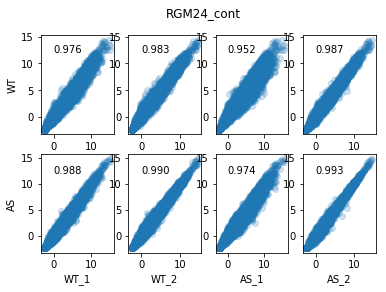

In [143]:
#Look at scatter of rlog for replicate 3 vs 2 and 1

#for nmpp1 in ['cont', 'drug']:
#for tf_del in ['WT','RG','M24','RGM24']

nmpp1 = 'cont'
tf_del = 'RGM24'


fig, axarr = plt.subplots(2,4)

y1_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']=='3') &
                          (metadata_SC_orig['pka_AS_mut']=='WT')
                         ]
y1 = rlog_all.loc[:,str(y1_ind.index[0])]


y2_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']=='3') &
                          (metadata_SC_orig['pka_AS_mut']=='AS')
                         ]
y2 = rlog_all.loc[:,str(y2_ind.index[0])]

jj = 0
for pka_as_mut in ['WT','AS']:
    for replicate in ['1','2']:
        x_ind = metadata_SC_orig[(metadata_SC_orig['NMPP1']==nmpp1) & 
                          (metadata_SC_orig['tf_del'] == tf_del) &
                          (metadata_SC_orig['replicate']==replicate) &
                          (metadata_SC_orig['pka_AS_mut']==pka_as_mut)
                         ]
        x = rlog_all.loc[:,str(x_ind.index[0])]
        
        ax = axarr[0,jj]
        ax.scatter(x,y1,alpha = 0.2)
        if jj==0:
            ax.set_ylabel('WT')
        ax.text(0,12,'{:0.3f}'.format(np.corrcoef(x,y1)[0,1]))
        
        ax = axarr[1,jj]
        if jj==0:
            ax.set_ylabel('AS')
        ax.scatter(x,y2,alpha = 0.2)
        
        ax.text(0,12,'{:0.3f}'.format(np.corrcoef(x,y2)[0,1]))
        
        ax.set_xlabel(pka_as_mut + '_' + replicate)
        
        jj = jj + 1
        
fig.suptitle(tf_del + '_' + nmpp1)


In [88]:
#Load mean rlog data
rlog_data_mean_var = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_rlog_mean_SC.csv' ),index_col=0)



In [90]:
rlog_data_mean_var.columns

Index(['AS_M24_cont_mean', 'AS_M24_drug_mean', 'AS_RGM24_cont_mean',
       'AS_RGM24_drug_mean', 'AS_RG_cont_mean', 'AS_RG_drug_mean',
       'AS_WT_cont_mean', 'AS_WT_drug_mean', 'WT_M24_cont_mean',
       'WT_M24_drug_mean', 'WT_RGM24_cont_mean', 'WT_RGM24_drug_mean',
       'WT_RG_cont_mean', 'WT_RG_drug_mean', 'WT_WT_cont_mean',
       'WT_WT_drug_mean', 'AS_M24_cont_var', 'AS_M24_drug_var',
       'AS_RGM24_cont_var', 'AS_RGM24_drug_var', 'AS_RG_cont_var',
       'AS_RG_drug_var', 'AS_WT_cont_var', 'AS_WT_drug_var', 'WT_M24_cont_var',
       'WT_M24_drug_var', 'WT_RGM24_cont_var', 'WT_RGM24_drug_var',
       'WT_RG_cont_var', 'WT_RG_drug_var', 'WT_WT_cont_var', 'WT_WT_drug_var',
       'SC_common_name'],
      dtype='object')

In [92]:
spec = 'SC'

data = []

xlabel = 'AS_WT_drug_mean'
ylabel = 'AS_RG_drug_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [93]:
spec = 'SC'

data = []

xlabel = 'AS_WT_cont_mean'
ylabel = 'AS_RG_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [94]:
spec = 'SC'

data = []

xlabel = 'WT_WT_cont_mean'
ylabel = 'WT_RG_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [95]:
spec = 'SC'

data = []

xlabel = 'WT_WT_cont_mean'
ylabel = 'AS_WT_cont_mean'

trace = pygo.Scatter(
            x = rlog_data_mean_var[xlabel], 
            y =  rlog_data_mean_var[ylabel],
            text = rlog_data_mean_var['SC_common_name'],
            mode = 'markers',
            marker = {'opacity': 0.5}, #, 
                      #'color': 'rgba'+str(cmap(NN/10))}, 
            name = xlabel + ' vs ' + ylabel 
        )
        
data.append(trace)

layout = pygo.Layout(
    xaxis= {
        #"range":[-20, 20],
        "title": 'mean rlog ' + xlabel
    },
    yaxis= {
        #"range":[-10, 10],
        "title": 'mean rlog ' + ylabel
    }
)


fig = pygo.Figure(data=data, layout = layout)
py.iplot(fig, filename= xlabel + '_vs_' + ylabel + '_' + spec + '_mean_rlog')

In [27]:
?pd.MultiIndex
#metadata_SC['pka_AS_mut'] + '_' + metadata_SC['tf_del'] + '_' + metadata_SC['NMPP1'] 

## Look at Msn24 and Rph1/Gis1 genes projected onto only orthologs

In [12]:
#Load Ortholog data

ohnologs = pd.read_csv(data_processing_dir + os.path.normpath("ortholog_files_YGOB/ohnologs.csv"), index_col=0)
print('Total number of Ohnologs: ' + str(len(ohnologs)))


Total number of Ohnologs: 547


In [4]:
#Make rlog average for AS -NMPP1 and AS +NMPP1

#Load DEseq data for SCer PKA AS -/+ NMPP1 
pkainh_deseq = pd.read_csv(os.path.normpath(data_processing_dir + '\\kl_sc_PKA_as_m24_r1g1_20181017\\20181017_deseq_SC_AS_WT_nmpp1.csv'), index_col=0)
pkainh_deseq['SC_common_name'] = io_library.SC_common_name_lookup(pkainh_deseq.index)



In [14]:
#build a dataframe that has all SC paralogs paired up with another dataframe (in this case LFC and padj for PKA inhibition

data_to_add = pkainh_deseq.loc[:,['log2FoldChange','padj']]
sort_column = 'log2FoldChange'

ohnologs_expression_sorted = io_library.join_ohnologs_and_sort(data_to_add, ohnologs, sort_column)


In [121]:
msn24_sets['M_75']

['YGR088W',
 'YFL014W',
 'YMR174C',
 'YML128C',
 'YOR173W',
 'YBR072W',
 'YDR453C',
 'YMR175W',
 'YPR160W',
 'YMR169C',
 'YPL186C',
 'YGR256W',
 'YNR034W-A',
 'YBR116C',
 'YER103W',
 'YMR196W',
 'YGR248W',
 'YOR120W',
 'YER054C',
 'YIL136W',
 'YOL052C-A',
 'YGR008C',
 'YGR201C',
 'YMR250W',
 'YKL151C',
 'YNL195C',
 'YHR087W',
 'YMR090W',
 'YDR070C',
 'YJL161W',
 'YNL274C',
 'YDL085W',
 'YBR169C',
 'YIL155C',
 'YIL160C',
 'YHR139C',
 'YDR533C',
 'YBR230C',
 'YDL169C',
 'YNL200C',
 'YDL204W',
 'YGR281W',
 'YEL011W',
 'YLR258W',
 'YIL113W',
 'YBL064C',
 'YDR034W-B',
 'YNL160W',
 'YMR271C',
 'YML054C',
 'YBL078C',
 'YKL065W-A',
 'YLR164W',
 'YJR096W',
 'YMR118C',
 'YDL223C',
 'YHR097C',
 'YMR105C',
 'YOR374W',
 'YLR356W',
 'YHR140W',
 'YKL091C',
 'YKL163W',
 'YKR076W',
 'YPL123C',
 'YIR038C',
 'YFR017C',
 'YML100W',
 'YPL004C',
 'YER150W',
 'YAL061W',
 'YCL035C',
 'YBR147W',
 'YKL026C',
 'YJR155W',
 'YDR231C',
 'YBR241C',
 'YGR174C',
 'YNL202W',
 'YOR215C',
 'YOR228C',
 'YAL017W',
 'YBR214

In [129]:
#Loop through High ortholog and low ortholog
#Plot each of the groups of data 

msn2_level = 'M_75'

x1,y1 = (2.0,15)
x2,y2 = (2.5,0.0)
ymin = 1.5

symbols = {'low':'square-open', 'high':'circle'}

groups = {'r1g1_act_only' : set(r1g1_rep_genes.index) - set(msn24_sets[msn2_level]), 
          'm24_nmpp1_only' : set(msn24_sets[msn2_level]) - set(r1g1_rep_genes.index) ,
          'r1g1_act_and_m24_nmpp1' : (set(msn24_sets[msn2_level]) & set(r1g1_rep_genes.index)),
          'others' : ((set(ohnologs_expression_sorted['sc_genename_high']) | set(ohnologs_expression_sorted['sc_genename_low'])) -  ((set(msn24_sets[msn2_level]) | set(r1g1_rep_genes.index))))
         }

colors = {'r1g1_act_only' : 'blue', 
          'm24_nmpp1_only' : 'red',
          'r1g1_act_and_m24_nmpp1' : 'green',
          'others' : 'grey'
         }


data = []

hover_text = ('low Paralog: ' + ohnologs_expression_sorted['SC_common_name_low'] + 
              '<br>high Paralog: ' + ohnologs_expression_sorted['SC_common_name_high'] + 
              '<br>low Paralog LFC: ' + ["{:.3}".format(val) for val in ohnologs_expression_sorted['log2FoldChange_low']] +
              '<br>high Paralog LFC: ' + ["{:.3}".format(val) for val in ohnologs_expression_sorted['log2FoldChange_high']]
             )


ohnologs_expression_sorted['hover_text'] = hover_text
              
for level in ['low', 'high']:
    
    # other_deseq= r1g1_deseq
    # other_name = 'r1g1'

    # #deseq_data = pkainh_deseq.merge(m24_nmpp1_int_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_m24_nmpp1'))
    # deseq_data = pkainh_deseq.merge(other_deseq,how='left',left_index = True, right_index=True, suffixes=('_pkainh', '_' + other_name))

    # hover_text = []
    # for ind, row in deseq_data.iterrows():
    #     hover_text.append(('{SC_common_name}<br>padj 1NMPP1: {pkainh_padj:.2f}<br>padj ' + other_name +' : {other_padj:.2f}').format(
    #                               SC_common_name=row['SC_common_name_pkainh'],
    #                               pkainh_padj = -np.log10(row['padj_pkainh']),
    #                               other_padj = -np.log10(row['padj_' + other_name])
    #                               ))
    
    for group_name,group in groups.items():
        
        opacity = 0.8
        if group_name == 'others':
            opacity =0.3
        
        data_subset = ohnologs_expression_sorted[ohnologs_expression_sorted['sc_genename_' + level].isin(group)]
        
        hover_text = data_subset['hover_text']
        
        trace = pygo.Scatter(
                    x = data_subset['log2FoldChange_' + level], 
                    y =  -np.log10(data_subset['padj_' + level]),
                    text = hover_text,
                    mode = 'markers',
                    marker = {'opacity': opacity, 
                              'symbol': symbols[level],
                              'color' : colors[group_name]
                             }, 
                    #'color': 'rgba'+str(cmap(NN/10))}, 
                    name = group_name + ' ' + level
                )
        
        data.append(trace)

x = np.array([x1,x2])

trace2 = pygo.Scatter(
    x = x,
    y = y2- (y2-y1)/(x2-x1)*(x2-x),
    mode = 'lines',
    marker = {'color': 'black',
              'size': 5},
    name = 'LFC/padj threshold'
)

data.append(trace2)

if y2-y1<0: #Line has negative slope - looking at right side of axis
    x_at_ymin1 = x1
    x_at_ymin2 = max(x_data)

elif y2-y1 >0:   #Line has positive slope - looking at left side of axis
    x_at_ymin1 = x2
    x_at_ymin2 = min(x_data)

x = np.array([x_at_ymin1, x_at_ymin2])
y = np.array([ymin, ymin])

trace3 = pygo.Scatter(
    x = x,
    y = y,
    mode = 'lines',
    marker = {'color': 'black',
              'size': 5},
    name = 'pvalue threshold'
)


data.append(trace3)

layout = pygo.Layout(
    xaxis= {
        #"range":[-2, 20],
        "title":'LFC'
    },
    yaxis= {
        #"range":[-2, 20],
        "title":'-log10(padj)'
    }
)


fig = pygo.Figure(data=data, layout = layout) 

py.iplot(fig, filename= 'SC_PKA_inh_paralogs_r1g1_' +msn2_level)

## Comparing pre to post UTR data

In [ ]:
#compare raw counts (logged with pseudocount) (as -drug, as +drug)

#load raw counts 





In [ ]:
#compare rlog data

# GOI plot effect of deletions 
